In [1]:
!pip install -q torch torchvision torchaudio
!pip install -q transformers diffusers accelerate sentencepiece
!pip install -q soundfile opencv-python pillow
!pip install -q openai-whisper gradio numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 21.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import torch, transformers, diffusers, whisper
print("ALL LIBRARIES WORKING")


ALL LIBRARIES WORKING


In [ ]:
#TEXT TO IMAGE

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


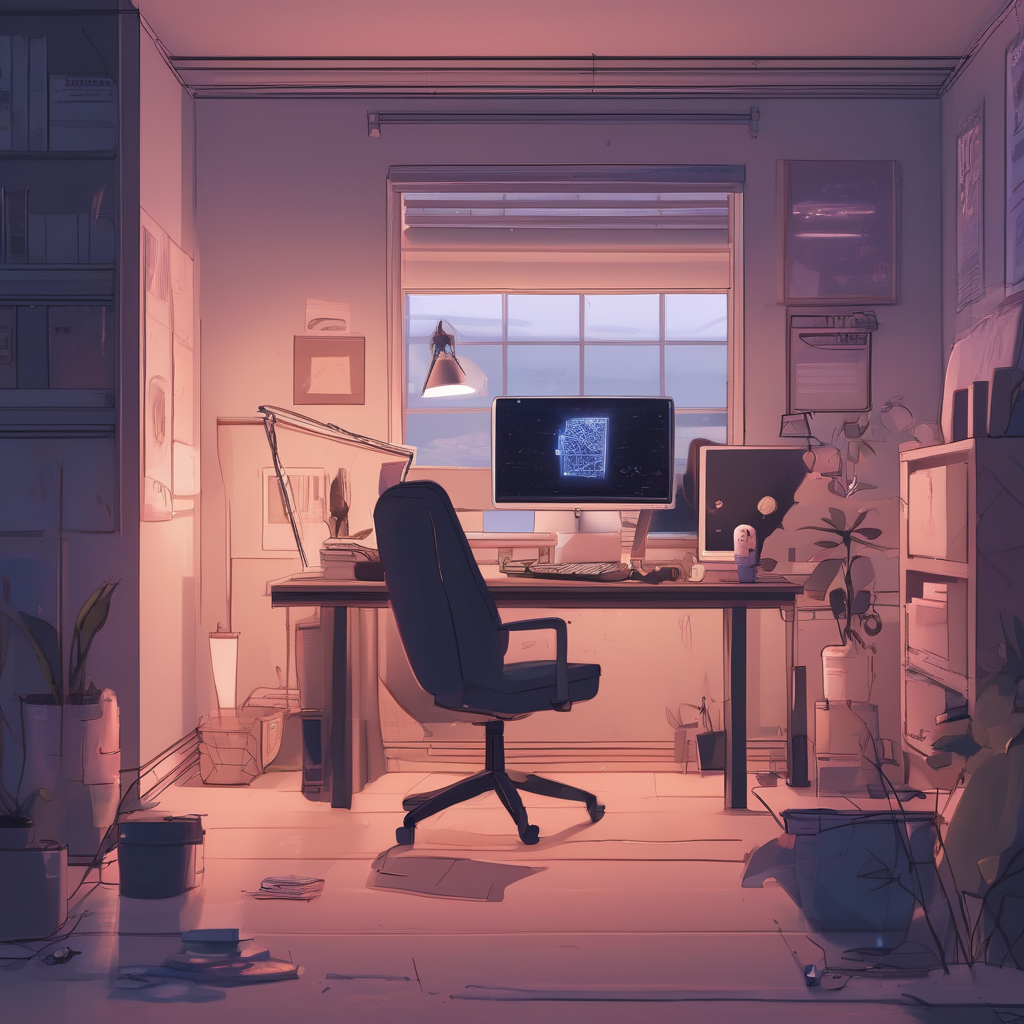

In [3]:
import torch
from diffusers import StableDiffusionXLPipeline

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
)
pipe.to("cuda")

image = pipe("A peaceful AI workspace at night").images[0]
image


In [4]:
# IMAGE -> TEXT (BLIP) - COLAB SAFE

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Download a sample image (no manual upload needed)
image_url = "https://images.unsplash.com/photo-1519389950473-47ba0277781c"
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")

# Load processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Prepare inputs
inputs = processor(image, return_tensors="pt")

# Generate caption
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)

print("IMAGE CAPTION:")
print(caption)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

IMAGE CAPTION:
a group of people working on laptops


In [7]:
# AUDIO -> TEXT (WHISPER) - UPLOADED FILE SAFE

import whisper
import os

# CHANGE THIS to your uploaded file name
audio_file = "Song-1.wav"

# Safety check
if not os.path.exists(audio_file):
    raise FileNotFoundError("Audio file not found. Please upload it first.")

# Load Whisper model
model = whisper.load_model("small")

# Transcribe
result = model.transcribe(audio_file)

print("TRANSCRIBED TEXT:")
print(result["text"])


100%|███████████████████████████████████████| 461M/461M [00:22<00:00, 21.9MiB/s]


TRANSCRIBED TEXT:
 MatterZ Thanks for watching!


In [ ]:
# TEXT TO AUDIO

In [10]:
from transformers import pipeline
import soundfile as sf
from IPython.display import Audio
import os

# Text to convert
text = " This is a multimodal generative AI project."

# Load text-to-speech pipeline (stable, widely used)
tts = pipeline(
    task="text-to-speech",
    model="suno/bark-small"
)

# Generate audio
audio_output = tts(text)

# Save audio
output_file = "generated_speech.wav"
sf.write(output_file, audio_output["audio"].flatten(), audio_output["sampling_rate"], subtype='FLOAT')

print("Audio file saved as:", output_file)

# Play audio in Colab
Audio(output_file)

Device set to use cuda:0
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


Audio file saved as: generated_speech.wav


In [ ]:
# VIDEO TO TEXT

In [11]:
from google.colab import files

uploaded = files.upload()


Saving sample-5s.mp4 to sample-5s.mp4


In [12]:
!pip install -q transformers pillow opencv-python


Frame extracted successfully


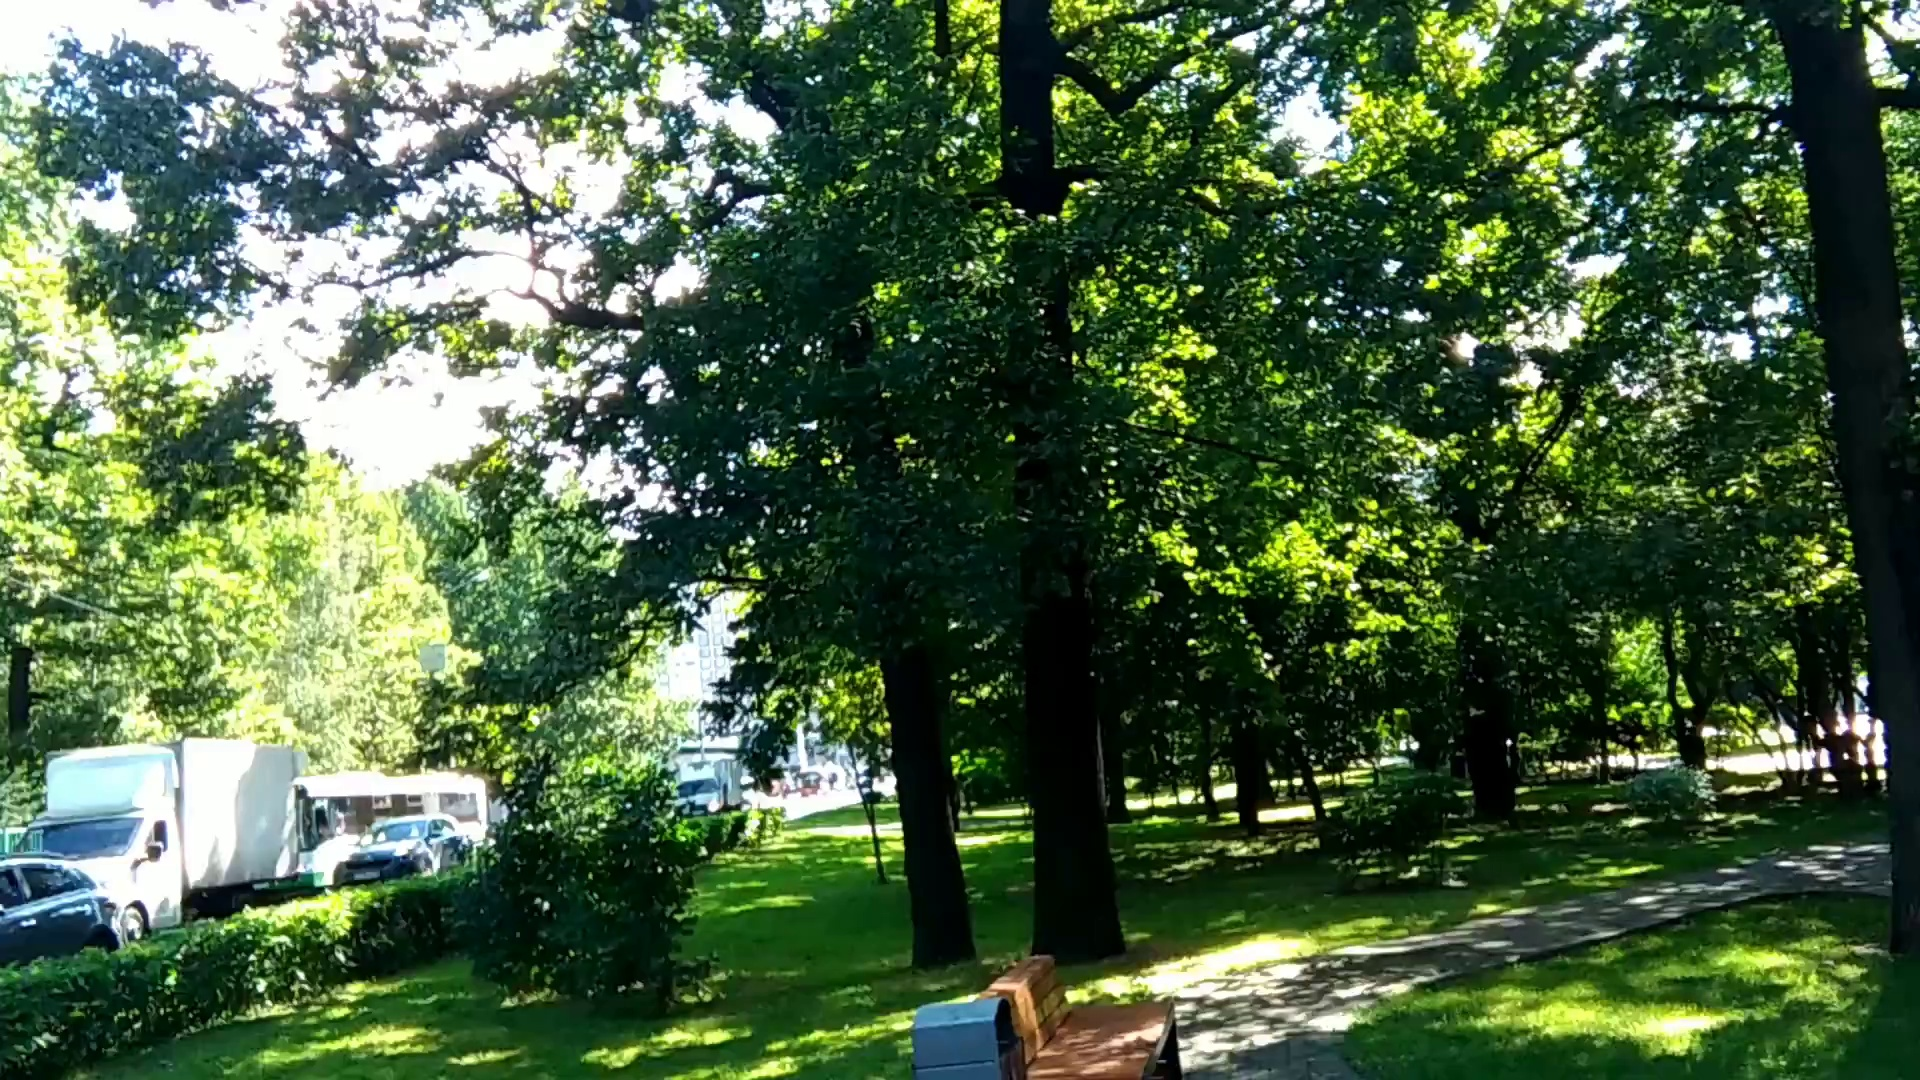

In [13]:
import cv2
from PIL import Image

video_path = "sample-5s.mp4"   # CHANGE THIS
frame_output = "video_frame.jpg"

cap = cv2.VideoCapture(video_path)
success, frame = cap.read()
cap.release()

if success:
    cv2.imwrite(frame_output, frame)
    print("Frame extracted successfully")
else:
    print("Failed to extract frame")

Image.open(frame_output)


In [ ]:
# FRAME FROM VIDEO  TO TEXT

In [14]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base"
)

# Load image
image = Image.open("video_frame.jpg").convert("RGB")

# Process
inputs = processor(image, return_tensors="pt")

# Generate caption
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)

print("VIDEO DESCRIPTION:")
print(caption)


VIDEO DESCRIPTION:
a park with a lot of trees and a few cars
